In [66]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import chardet

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import scipy.stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
df_climb = pd.read_csv('Climbharder #V3 (Responses) - Form responses 1.csv')

In [68]:
df_climb.head()

,Timestamp,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Where do you climb?,Hardest V Grade ever climbed,Hardest V Grade climbed in the Last 3 months,The V grade you can send 90-100% of routes,...,Frequency of Endurance training sesions per week,Endurance training,General Strength Training frequency per week,Time spent General strength training (hours),Type of Strength training,"Other activities (ie yoga, cardio)",Max pull up reps,5 rep max weighted pull ups,max push ups reps,max L-sit time
0,29/01/2017 20:12:46,Male,173,77,178,4.5 - 5 years,Indoor and outdoor climbing,V8,V8,V6,...,1,4x4,3,4,"Antagonists, Legs, Core",NaN,15,29kg,40,30
1,29/01/2017 20:17:27,Male,180,81,180,3 - 3.5 years,Indoor Climbing only,V3,V3,V1,...,1,Laps of routes,2,2,"Antagonists, Legs, Core, Upper body pulling, U...","Yoga, stretching",11,5kg,24,15sec
2,29/01/2017 20:28:14,Male,178,67,175,.5 - 1 years,Indoor and outdoor climbing,V7,V6,V5,...,2,"4x4, ARC, route climbing intervals",3,2,"Antagonists, Core, Upper body pulling, Upper b...",soccer,17,20 kg,NaN,NaN
3,29/01/2017 20:51:08,Male,173,70,178,9 - 9.5 years,Indoor and outdoor climbing,V5,V4,V3,...,1,"Laps of routes, route climbing intervals",0,0,"Antagonists, Legs, Core, No other strength tra...",NaN,8,NaN,30,NaN
4,29/01/2017 21:03:19,Male,184,84,197,6.5 - 7 years,Indoor and outdoor climbing,V10,V10,V7,...,2,"4x4, Max moves, threshold intervals",2,1,"Core, Upper body pushing",NaN,NaN,NaN,NaN,NaN


In [69]:
df_climb.columns

Index(['Timestamp', 'Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Where do you climb?',
       'Hardest V Grade ever climbed ',
       'Hardest V Grade climbed in the Last 3 months',
       'The V grade you can send 90-100% of routes ',
       'Hardest Route grade climbed (Ewbank grade) ',
       'Hardest route climbed last 3 months (ewbank)',
       'Route grade you can send 90-100% of climbs',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Hangboard grips used ',
       'Style of Hangboarding chosen ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
    

In [70]:
df_climb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 35 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Timestamp                                                                           608 non-null    object
 1   Sex                                                                                 608 non-null    object
 2   Height (cm)                                                                         608 non-null    object
 3   Weight (KG)                                                                         608 non-null    object
 4   Arm Span (cm)                                                                       605 non-null    object
 5   How long have you been climbing for?                                                608 non-null    object

In [71]:
#Drop the unusable columns
df_climb.drop(['Timestamp', 'Where do you climb?','Hardest V Grade climbed in the Last 3 months',
       'The V grade you can send 90-100% of routes ',
       'Hardest Route grade climbed (Ewbank grade) ',
       'Hardest route climbed last 3 months (ewbank)',
       'Route grade you can send 90-100% of climbs',
       'Hangboard Frequency per week ', 'Hangboard grips used ',
       'Style of Hangboarding chosen ', 'Endurance training ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
       'Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds) ',
       'Type of Strength training', 'Other activities (ie yoga, cardio)','max L-sit time ','5 rep max weighted pull ups',], inplace=True, axis=1)

In [72]:
df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps
0,Male,173,77,178,4.5 - 5 years,V8,4,8,6,0,0,1,3,4,15,40
1,Male,180,81,180,3 - 3.5 years,V3,1,3,10,0,0,1,2,2,11,24
2,Male,178,67,175,.5 - 1 years,V7,3,4,3,0,0,2,3,2,17,NaN
3,Male,173,70,178,9 - 9.5 years,V5,2,6,1,0,0,1,0,0,8,30
4,Male,184,84,197,6.5 - 7 years,V10,6,10,2,0,0,2,2,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Female,159,54,161,More than 15 years,V9,3,5,5,0,0,0,3,2,8,NaN
604,Male,179,78,178,0 - .5 years,V3,3,2,0,0,0,0,1,1,NaN,NaN
605,Female,150,49,150,1 - 1.5 years,V3,2,4,0,0,0,0,0,0,NaN,NaN
606,Male,8,889,60,2.5 - 3 years,V4,4,7,10,4,9,6,2,6,NaN,NaN


In [73]:
#Drop NaN values from the entire dataframe
df_climb.dropna(inplace=True)

df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps
0,Male,173,77,178,4.5 - 5 years,V8,4,8,6,0,0,1,3,4,15,40
1,Male,180,81,180,3 - 3.5 years,V3,1,3,10,0,0,1,2,2,11,24
3,Male,173,70,178,9 - 9.5 years,V5,2,6,1,0,0,1,0,0,8,30
5,Male,176,67,170,5 - 5.5 years,V7,0,0,0,0,0,0,4,6,9,15
6,Male,184,75,181,1 - 1.5 years,V4,2,4,0,0,0,0,2,4,15,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Male,186,67,191,14 - 14.5 years,V9,1,4,4,0,0,0,1,2,17,30
594,Male,187,63,190,5.5 - 6 years,V8,3,6,2,0,0,0,1,1,21,20
596,Male,173,68,173,8 - 8.5 years,V12,4,10,4,0,0,0,3,6,25,30
598,Male,181,75,180,More than 15 years,V9,3,8,1,0,0,0,0,0,12,20


In [74]:
df_climb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 607
Data columns (total 16 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Sex                                                       374 non-null    object
 1   Height (cm)                                               374 non-null    object
 2   Weight (KG)                                               374 non-null    object
 3   Arm Span (cm)                                             374 non-null    object
 4   How long have you been climbing for?                      374 non-null    object
 5   Hardest V Grade ever climbed                              374 non-null    object
 6   Frequency of climbing sessions per week                   374 non-null    int64 
 7   Average hours climbing per week (not including training)  374 non-null    int64 
 8   Average hours Training for cli

In [76]:
df_climb.describe()

,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours)
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,2.986631,6.863636,3.168449,0.401070,0.326203,0.695187,1.946524,2.342246
std,1.114050,3.602221,2.935585,0.781556,0.747118,0.901669,1.450645,2.404304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,4.000000,9.000000,4.000000,1.000000,0.750000,1.000000,3.000000,3.000000
max,7.000000,24.000000,15.000000,6.000000,9.000000,7.000000,7.000000,15.000000


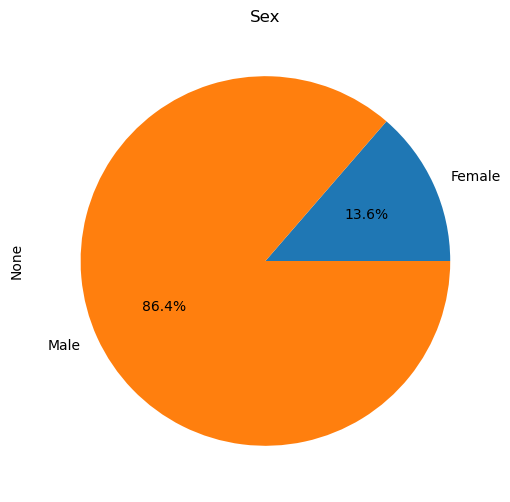

In [77]:
#plot sex ot see values
plot = df_climb.groupby(df_climb.columns[0]).count().max(axis=1).plot.pie(title="Sex",autopct='%1.1f%%',figsize=(6,6))

In [78]:
unique_values = df_climb['Height (cm)'].unique()

unique_values

array(['173', '180', '176', '184', '186', '178', '168', '163', '174',
       '188', '190', '177', '179', '165.1', '183', '167', '182', '170',
       '62', '193', '172.72', '182.8', '175', '165', '171', '160', '172',
       '185', '181', '191', '180.5', '153', '152', '1.68', '192', '167cm',
       '5 ft 8inches. Im amurican i dont know what centimeters are',
       '196', '159.38', '166', '182.88', '1.67', '159', '173 cm', '162.5',
       '189', '162', '177.8', '167.5', '190.5', '187.96', '155', '187',
       '169', '182.9', '177.5', '194', '1295', '175.26', '162.56',
       '167.64', '168.5', '164', '185.3', '110', '158.75', '201.1'],
      dtype=object)

In [79]:
#Drop the rows with specific values that do not work with the analysis
df_climb = df_climb.query("`Height (cm)` not in ['62','8','1.68','1.67','1295','173 cm','167cm''5 ft 8inches. Im amurican i dont know what centimeters are']")

In [80]:
unique_values = df_climb['Height (cm)'].unique()

unique_values

array(['173', '180', '176', '184', '186', '178', '168', '163', '174',
       '188', '190', '177', '179', '165.1', '183', '167', '182', '170',
       '193', '172.72', '182.8', '175', '165', '171', '160', '172', '185',
       '181', '191', '180.5', '153', '152', '192', '167cm',
       '5 ft 8inches. Im amurican i dont know what centimeters are',
       '196', '159.38', '166', '182.88', '159', '162.5', '189', '162',
       '177.8', '167.5', '190.5', '187.96', '155', '187', '169', '182.9',
       '177.5', '194', '175.26', '162.56', '167.64', '168.5', '164',
       '185.3', '110', '158.75', '201.1'], dtype=object)

In [81]:
#height to numeric and drop NaN vlaues
df_climb['Height (cm)'] = pd.to_numeric(df_climb['Height (cm)'], errors='coerce')
df_climb = df_climb.dropna(subset=['Height (cm)'])

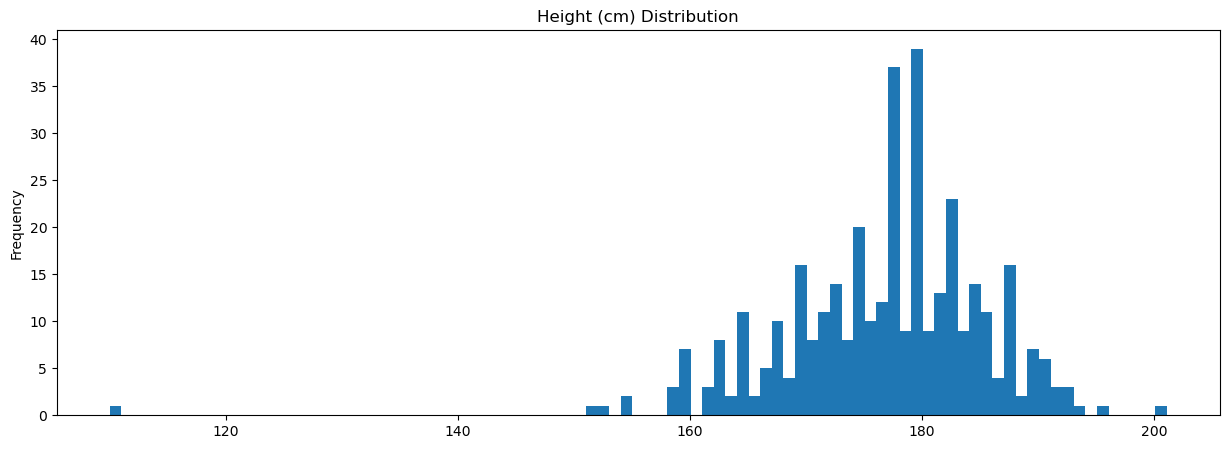

In [82]:
plot = df_climb[df_climb.columns[1]].plot.hist(title="Height (cm) Distribution",
      bins=int(df_climb[df_climb.columns[1]].max()-df_climb[df_climb.columns[1]].min()),figsize=(15, 5))

In [83]:
unique_values = df_climb['Weight (KG)'].unique()

unique_values

array(['77', '81', '70', '67', '75', '88', '81.6', '54', '65', '100',
       '60', '82', '66', '69', '53', '79.5', '73', '86', '72', '64', '76',
       '70.3', '80', '79', '72.5', '79.3787', '59', '74', '66.5', '87',
       '52', '71', '68', '63', '78', '77.5', '84', '73.4', '58', '85',
       '93', '79.4', '50', '60.5', '65.8', '45.5', '51', '57', '48', '95',
       '62.6', '60.7', '83', '127', '51.7095', '72.5748', '53.5', '89',
       '51-53...', '55', '56', '65.7', '92', '158', '61.2', '68.7',
       '74.8', '81.6466', '132', '61', '47', '77.1', '77.5643', '66kg',
       '~55', '88.45', '113', '56.699', '63.5', '66.22', '62.5', '58.967',
       '65.5', '165', '175', '73.66', '78kg', '180', '60.328', '67.2',
       '68.3', '45', '62', '58.96'], dtype=object)

In [84]:
#Drop the rows with specific values that do not work with the analysis
df_climb = df_climb.query("`Weight (KG)` not in ['132','66kg','78kg','51-53...','158','180', '127','113','~55','165', '175']")

In [85]:
unique_values = df_climb['Weight (KG)'].unique()

unique_values

array(['77', '81', '70', '67', '75', '88', '81.6', '54', '65', '100',
       '60', '82', '66', '69', '53', '79.5', '73', '86', '72', '64', '76',
       '70.3', '80', '79', '72.5', '79.3787', '59', '74', '66.5', '87',
       '52', '71', '68', '63', '78', '77.5', '84', '73.4', '58', '85',
       '93', '79.4', '50', '60.5', '65.8', '45.5', '51', '57', '48', '95',
       '62.6', '60.7', '83', '51.7095', '72.5748', '53.5', '89', '55',
       '56', '65.7', '92', '61.2', '68.7', '74.8', '81.6466', '61', '47',
       '77.1', '77.5643', '88.45', '56.699', '63.5', '66.22', '62.5',
       '58.967', '65.5', '73.66', '60.328', '67.2', '68.3', '45', '62',
       '58.96'], dtype=object)

In [86]:
#weight to numeric and drop NaN values
df_climb['Weight (KG)'] = pd.to_numeric(df_climb['Weight (KG)'], errors='coerce')
df_climb = df_climb.dropna(subset=['Weight (KG)'])

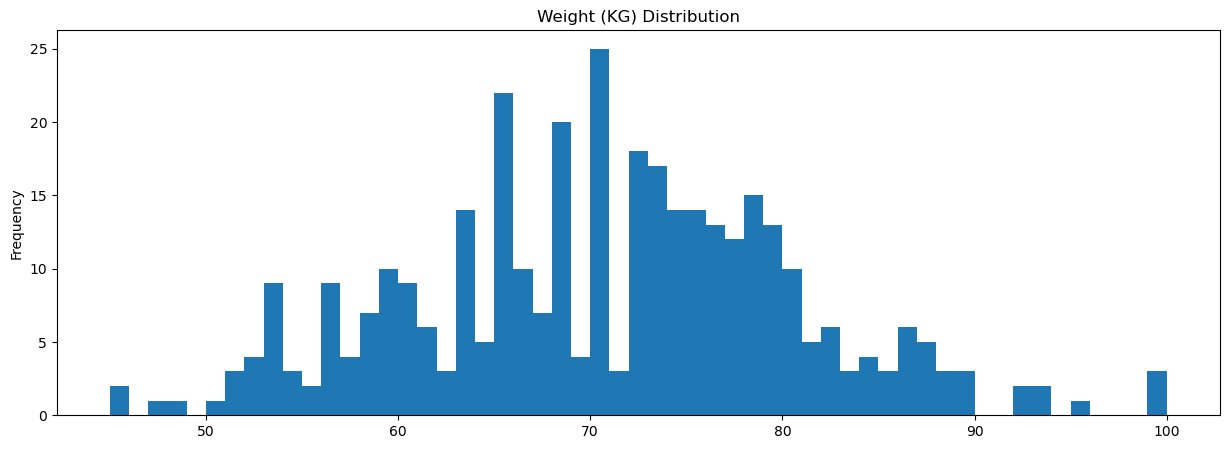

In [87]:
plot = df_climb[df_climb.columns[2]].plot.hist(title="Weight (KG) Distribution",
      bins=int(df_climb[df_climb.columns[2]].max()-df_climb[df_climb.columns[2]].min()),figsize=(15, 5))

In [88]:
unique_values = df_climb['Arm Span (cm)'].unique()

unique_values

array(['178', '180', '170', '181', '192', '165', '195.6', '177', '197',
       '165.1', '185', '190', '179', '173', '182', '187', '193', '176',
       '189', '85', '184', '183', '195', '163', '171', '200', '172',
       '194', '188', '190.5', '?', 'no idea', '172cm', '186', '110',
       '169', '155', 'Not sure', '150', '199', '191', 'unknown', '**',
       '60', '175', '170.7', '160', '201', '198', '196', '158', '162',
       '177.8', '167', '193.4', '198.12', 'Unknown', '157', '174',
       '195.58', '168', '76', '155 cm', '208', '0', '161', '162.56',
       '164', '185.928', '167.64', '80', '75'], dtype=object)

In [89]:
#Drop the rows with specific values that do not work with the analysis
df_climb = df_climb.query("`Arm Span (cm)` not in ['Not sure', 'unknown', '**', 'Unknown','0','155 cm','?', 'no idea', '172cm','60','80', '75','76','85']")

In [90]:
unique_values = df_climb['Arm Span (cm)'].unique()

unique_values

array(['178', '180', '170', '181', '192', '165', '195.6', '177', '197',
       '165.1', '185', '190', '179', '173', '182', '187', '193', '176',
       '189', '184', '183', '195', '163', '171', '200', '172', '194',
       '188', '190.5', '186', '110', '169', '155', '150', '199', '191',
       '175', '170.7', '160', '201', '198', '196', '158', '162', '177.8',
       '167', '193.4', '198.12', '157', '174', '195.58', '168', '208',
       '161', '162.56', '164', '185.928', '167.64'], dtype=object)

In [91]:
#Span to numeric and drop NaN
df_climb['Arm Span (cm)'] = pd.to_numeric(df_climb['Arm Span (cm)'], errors='coerce')
df_climb = df_climb.dropna(subset=['Arm Span (cm)'])

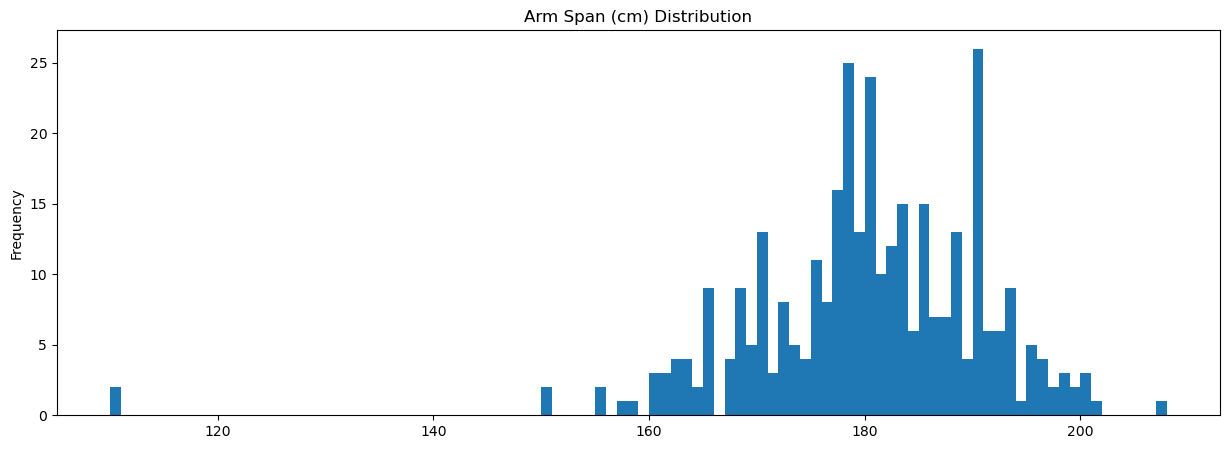

In [92]:
plot = df_climb[df_climb.columns[3]].plot.hist(title="Arm Span (cm) Distribution",
      bins=int(df_climb[df_climb.columns[3]].max()-df_climb[df_climb.columns[3]].min()),figsize=(15, 5))

In [93]:
unique_values = df_climb['How long have you been climbing for?'].unique()

unique_values

array(['4.5 - 5 years', '3 - 3.5 years', '9 - 9.5 years', '5 - 5.5 years',
       '1 - 1.5 years', '1.5 - 2 years', '5.5 - 6 years', '3.5 - 4 years',
       '2.5 - 3 years', '7.5 - 8 years', '12 - 12.5 years',
       '0 - .5 years', '2 - 2.5 years', 'More than 15 years',
       '.5 - 1 years', '11.5 - 12 years', '14.5 - 15 years',
       '4 - 4.5 years', '10.5 - 11 years', '13 - 13.5 years',
       '10 - 10.5 years', '7 - 7.5 years', '6.5 - 7 years',
       '11 - 11.5 years', '8 - 8.5 years', '14 - 14.5 years',
       '9.5 - 10 years', '6 - 6.5 years', '8.5 - 9 years',
       '12.5 - 13 years', '13.5 - 14 years'], dtype=object)

In [94]:
#map the current experience values to a new number so it can be used in analysis
experience = {'0 - .5 years': 1,
              '.5 - 1 years': 1,
              '1 - 1.5 years': 2,
              '1.5 - 2 years': 2,
              '2 - 2.5 years': 3,
              '2.5 - 3 years': 3, 
              '3 - 3.5 years': 4, 
              '3.5 - 4 years': 4,
              '4 - 4.5 years': 5, 
              '4.5 - 5 years': 5,
              '5 - 5.5 years': 6,
              '5.5 - 6 years': 6,
              '6 - 6.5 years': 7, 
              '6.5 - 7 years': 7, 
              '7 - 7.5 years': 8,  
              '7.5 - 8 years': 8,
              '8 - 8.5 years': 9,
              '8.5 - 9 years': 9, 
              '9 - 9.5 years': 10,
              '9.5 - 10 years': 10,
              '10 - 10.5 years': 11,
              '10.5 - 11 years': 11,
              '11 - 11.5 years': 12, 
              '11.5 - 12 years': 12,
              '12 - 12.5 years': 13,
              '12.5 - 13 years': 13,
              '13 - 13.5 years': 14, 
              '13.5 - 14 years': 14, 
              '14 - 14.5 years': 15,
              '14.5 - 15 years': 15,
              'More than 15 years': 16
             }

df_climb.loc[:, 'How long have you been climbing for?'] = df_climb['How long have you been climbing for?'].map(experience)


df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps
0,Male,173.0,77.0,178.0,5,V8,4,8,6,0,0,1,3,4,15,40
1,Male,180.0,81.0,180.0,4,V3,1,3,10,0,0,1,2,2,11,24
3,Male,173.0,70.0,178.0,10,V5,2,6,1,0,0,1,0,0,8,30
5,Male,176.0,67.0,170.0,6,V7,0,0,0,0,0,0,4,6,9,15
6,Male,184.0,75.0,181.0,2,V4,2,4,0,0,0,0,2,4,15,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Male,186.0,67.0,191.0,15,V9,1,4,4,0,0,0,1,2,17,30
594,Male,187.0,63.0,190.0,6,V8,3,6,2,0,0,0,1,1,21,20
596,Male,173.0,68.0,173.0,9,V12,4,10,4,0,0,0,3,6,25,30
598,Male,181.0,75.0,180.0,16,V9,3,8,1,0,0,0,0,0,12,20


In [95]:
unique_values = df_climb['Sex'].unique()

unique_values

array(['Male', 'Female'], dtype=object)

In [96]:
#map the current sex values to a number so it can be used in analysis
mapping = {'Male': 1, 'Female': 0}

df_climb.loc[:,'Sex'] = df_climb['Sex'].map(mapping).astype(int)

df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps
0,1,173.0,77.0,178.0,5,V8,4,8,6,0,0,1,3,4,15,40
1,1,180.0,81.0,180.0,4,V3,1,3,10,0,0,1,2,2,11,24
3,1,173.0,70.0,178.0,10,V5,2,6,1,0,0,1,0,0,8,30
5,1,176.0,67.0,170.0,6,V7,0,0,0,0,0,0,4,6,9,15
6,1,184.0,75.0,181.0,2,V4,2,4,0,0,0,0,2,4,15,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,V9,1,4,4,0,0,0,1,2,17,30
594,1,187.0,63.0,190.0,6,V8,3,6,2,0,0,0,1,1,21,20
596,1,173.0,68.0,173.0,9,V12,4,10,4,0,0,0,3,6,25,30
598,1,181.0,75.0,180.0,16,V9,3,8,1,0,0,0,0,0,12,20


In [97]:
unique_values = df_climb['Hardest V Grade ever climbed '].unique()

unique_values

array(['V8', 'V3', 'V5', 'V7', 'V4', 'V6', 'V11', 'V9', 'V10',
       "I don't boulder", 'V2', 'V13', 'V12', 'V14', 'V1'], dtype=object)

In [98]:
#replace the ' to make analysis easier
df_climb['Hardest V Grade ever climbed '] = df_climb['Hardest V Grade ever climbed '].str.replace("'", "")


In [99]:
#map the current V grade values to a new number so it can be used in analysis
mapping = {'V1':1,
           'V2':1,
           'V3': 2, 
           'V4': 3, 
           'V5': 4, 
           'V6': 5, 
           'V7': 6,
           'V8': 7,
           'V9': 8,
           'V10': 9,
           'V11': 10,
           'V12': 11,
           'V13':12,
           'V14': 13,
           'V15': 14, 
           'I dont boulder': 0
          }

df_climb.loc[:, 'Hardest V Grade ever climbed '] = df_climb['Hardest V Grade ever climbed '].map(mapping)


df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15
6,1,184.0,75.0,181.0,2,3,2,4,0,0,0,0,2,4,15,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20


In [100]:
unique_values = df_climb['Max pull up reps'].unique()

unique_values

array(['15', '11', '8', '9', '7', '12', '35', '10', '>20', '20', '5',
       '18', '13', '32', '25', '16', '6',
       "12?  I don't work on bodyweight pullups for reps.", '45', '1',
       '2', '3 x 8', '22', '15-20', '19', '14', '20?', '50', '30',
       'Unsure', '24', '15?', "don't know", '74', '0', '17',
       '5, maybe, not sure', '21', '15+', '31', 'approx 25', '4', '20+',
       '25ish', 'Not calculated before', '23', 'unsure', '3', '100',
       '8-12', '28', '12+ (max Untested)', '?', '80', '37', '55', '33',
       'Unknown ', '27',
       "The most I've gotten was 35ish but I don't usually try, it seems useless",
       'Idk', '70'], dtype=object)

In [101]:
#replace the ' to make analysis easier
df_climb['Max pull up reps'] = df_climb['Max pull up reps'].str.replace("'", "")

In [102]:
#Remove values that will not work for analysis
df_climb = df_climb.query("`Max pull up reps` not in ['The most Ive gotten was 35ish but I dont usually try, it seems useless','Idk','Not calculated before','Unsure', '25ish','unsure', 'Unknown ','12?  I dont work on bodyweight pullups for reps.','?','12+ (max Untested)','>20','3 x 8','dont know','approx 25','5, maybe, not sure','15?','8-12','15-20','20+','20?']")
                          

In [103]:
unique_values = df_climb['Max pull up reps'].unique()

unique_values

array(['15', '11', '8', '9', '7', '12', '35', '10', '20', '5', '18', '13',
       '32', '25', '16', '6', '45', '1', '2', '22', '19', '14', '50',
       '30', '24', '74', '0', '17', '21', '15+', '31', '4', '23', '3',
       '100', '28', '80', '37', '55', '33', '27', '70'], dtype=object)

In [104]:
df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15
6,1,184.0,75.0,181.0,2,3,2,4,0,0,0,0,2,4,15,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20


In [105]:
#replace the ' to make analysis easier
df_climb['max push ups reps'] = df_climb['max push ups reps'].str.replace("'", "")

In [106]:
unique_values = df_climb['max push ups reps'].unique()

unique_values

array(['40', '24', '30', '15', 'Dont know', '25', '120', '10', '20', '11',
       '50', '70', '22', '286', '115', '105', '30?', '112', '33', '45',
       '0', '35', '5', 'Not sure', '42', '12', '21', '80', 'lots?', '75',
       '46', '?', '100', '36', '55', 'Dunno', '65', 'No clue', '44', '60',
       '-', '14', '12 handstand p/u', '3', '28', 'Never tried this',
       '35-45', '31', '~30', '40ish', '18', '95', '30+', '69', '27', '4',
       'unknown', '118', '16', '40?', '52', '17', '10?', '43', '150',
       '85', '70/1min'], dtype=object)

In [107]:
#Remove values that will not work for analysis
df_climb = df_climb.query("`max push ups reps` not in ['70/1min','No idea','Unknown','40?','10?','unknown','25+ (max untested)', '30+','~30','35-45','Never tried this', 'Not calculated before', 'unsure', '40ish','12 handstand p/u', '-', '50-60','No clue','Dunno','?','Not sure','lots?','30?','Dont know']")


In [108]:
unique_values = df_climb['max push ups reps'].unique()

unique_values

array(['40', '24', '30', '15', '25', '120', '10', '20', '11', '50', '70',
       '22', '286', '115', '105', '112', '33', '45', '0', '35', '5', '42',
       '12', '21', '80', '75', '46', '100', '36', '55', '65', '44', '60',
       '14', '3', '28', '31', '18', '95', '69', '27', '4', '118', '16',
       '52', '17', '43', '150', '85'], dtype=object)

In [109]:
df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15
7,1,186.0,88.0,192.0,2,4,3,8,8,0,0,2,3,4,9,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20


In [110]:
unique_values = df_climb['Time spent General strength training (hours)'].unique()

unique_values

array([ 4,  2,  0,  6,  3,  1,  5,  8,  7, 10,  9, 15])

In [111]:
df_climb.columns

Index(['Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Hardest V Grade ever climbed ',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Campus Board frequency per week ',
       'Campus Board time per week (hours)',
       'Frequency of Endurance training sesions per week',
       'General Strength Training frequency per week ',
       'Time spent General strength training (hours)', 'Max pull up reps',
       'max push ups reps'],
      dtype='object')

In [112]:
#Add BMI column
df_climb['BMI'] = df_climb['Weight (KG)'] / ((df_climb['Height (cm)'] / 100) ** 2)

df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps,BMI
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40,25.727555
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24,25.000000
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30,23.388687
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15,21.629649
7,1,186.0,88.0,192.0,2,4,3,8,8,0,0,2,3,4,9,25,25.436467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30,19.366401
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20,18.015957
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30,22.720438
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20,22.893074


In [113]:
#Add APE Index column
df_climb['APE'] = df_climb['Arm Span (cm)'] / df_climb['Height (cm)']
df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps,BMI,APE
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40,25.727555,1.028902
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24,25.000000,1.000000
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30,23.388687,1.028902
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15,21.629649,0.965909
7,1,186.0,88.0,192.0,2,4,3,8,8,0,0,2,3,4,9,25,25.436467,1.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30,19.366401,1.026882
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20,18.015957,1.016043
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30,22.720438,1.000000
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20,22.893074,0.994475


In [114]:
df_climb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Sex                                                       298 non-null    int64  
 1   Height (cm)                                               298 non-null    float64
 2   Weight (KG)                                               298 non-null    float64
 3   Arm Span (cm)                                             298 non-null    float64
 4   How long have you been climbing for?                      298 non-null    int64  
 5   Hardest V Grade ever climbed                              298 non-null    int64  
 6   Frequency of climbing sessions per week                   298 non-null    int64  
 7   Average hours climbing per week (not including training)  298 non-null    int64  
 8   Average hours Traini

In [115]:
#change types to integers for analysis
df_climb['Max pull up reps'] = df_climb['Max pull up reps'].astype(int)
df_climb['max push ups reps'] = df_climb['max push ups reps'].astype(int)


In [116]:
#Add Pull up ratio column
df_climb["Pullup ratio"] = (df_climb["Weight (KG)"] + df_climb['Max pull up reps']) / df_climb["Weight (KG)"]
df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training (hours),Max pull up reps,max push ups reps,BMI,APE,Pullup ratio
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40,25.727555,1.028902,1.194805
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24,25.000000,1.000000,1.135802
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30,23.388687,1.028902,1.114286
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15,21.629649,0.965909,1.134328
7,1,186.0,88.0,192.0,2,4,3,8,8,0,0,2,3,4,9,25,25.436467,1.032258,1.102273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30,19.366401,1.026882,1.253731
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20,18.015957,1.016043,1.333333
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30,22.720438,1.000000,1.367647
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20,22.893074,0.994475,1.160000


In [117]:
df_climb.columns167

Index(['Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Hardest V Grade ever climbed ',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Campus Board frequency per week ',
       'Campus Board time per week (hours)',
       'Frequency of Endurance training sesions per week',
       'General Strength Training frequency per week ',
       'Time spent General strength training (hours)', 'Max pull up reps',
       'max push ups reps', 'BMI', 'APE', 'Pullup ratio'],
      dtype='object')

In [118]:
#Rename columns for easier understanding
df_climb = df_climb.rename(columns={'Time spent General strength training (hours)': 'Time spent General strength training per week (hours)'})


In [119]:
df_climb = df_climb.rename(columns={'How long have you been climbing for?': 'How long have you been climbing for (years)?'})

In [120]:
df_climb = df_climb.rename(columns={'max push ups reps': 'Max push ups reps'})

In [121]:
df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for (years)?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training per week (hours),Max pull up reps,Max push ups reps,BMI,APE,Pullup ratio
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40,25.727555,1.028902,1.194805
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24,25.000000,1.000000,1.135802
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30,23.388687,1.028902,1.114286
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15,21.629649,0.965909,1.134328
7,1,186.0,88.0,192.0,2,4,3,8,8,0,0,2,3,4,9,25,25.436467,1.032258,1.102273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30,19.366401,1.026882,1.253731
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20,18.015957,1.016043,1.333333
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30,22.720438,1.000000,1.367647
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20,22.893074,0.994475,1.160000


In [122]:
df_climb.columns

Index(['Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for (years)?',
       'Hardest V Grade ever climbed ',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Campus Board frequency per week ',
       'Campus Board time per week (hours)',
       'Frequency of Endurance training sesions per week',
       'General Strength Training frequency per week ',
       'Time spent General strength training per week (hours)',
       'Max pull up reps', 'Max push ups reps', 'BMI', 'APE', 'Pullup ratio'],
      dtype='object')

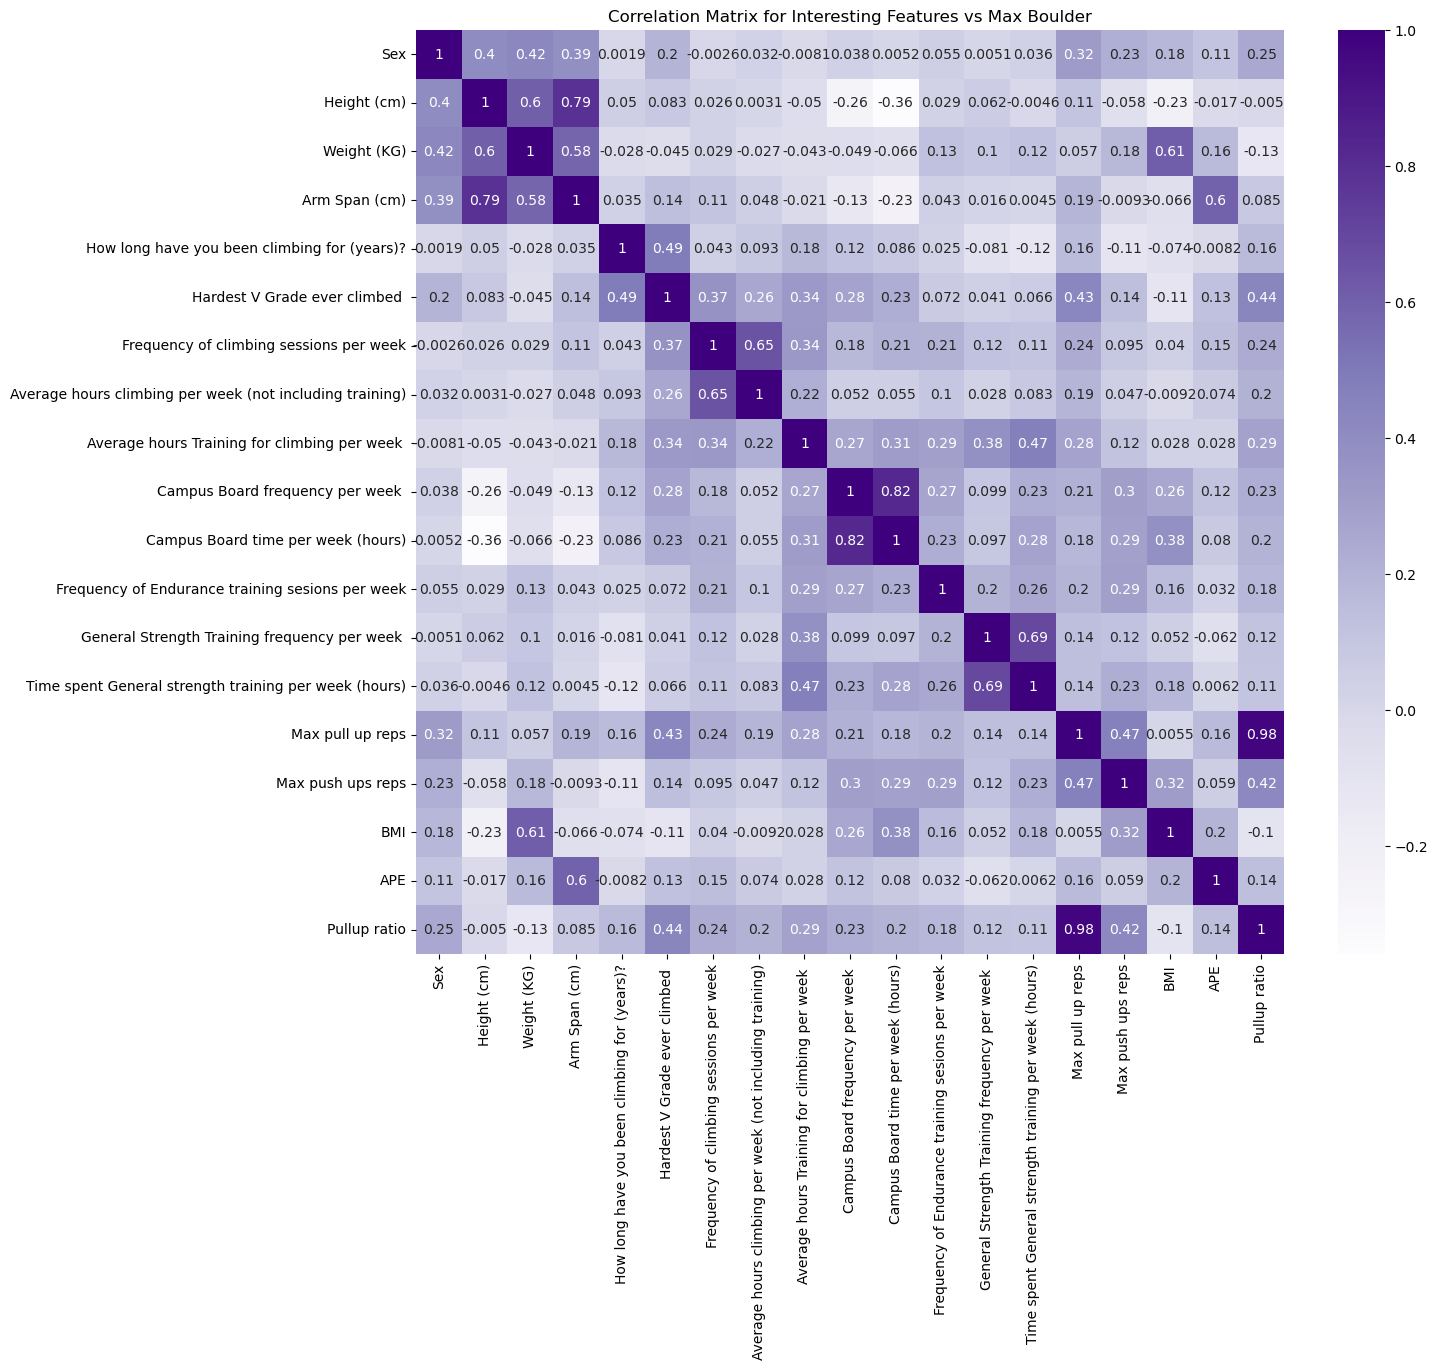

In [123]:
#select features for correlation matrix
feature = ['Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for (years)?',
       'Hardest V Grade ever climbed ',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Campus Board frequency per week ',
       'Campus Board time per week (hours)',
       'Frequency of Endurance training sesions per week',
       'General Strength Training frequency per week ',
       'Time spent General strength training per week (hours)',
       'Max pull up reps', 'Max push ups reps', 'BMI', 'APE', 'Pullup ratio']
df_feature = df_climb[feature]

corr = df_feature.corr()

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr, cmap='Purples', annot=True)
plt.title('Correlation Matrix for Interesting Features vs Max Boulder')
plt.show()

In [124]:
#seperate climbers into top and bottom ability based on max boulder
df_climb['top_or_bottom'] = pd.cut(df_climb['Hardest V Grade ever climbed '], bins=[0, 7, 15], labels=['Bottom', 'Top'])
df_climb

,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for (years)?,Hardest V Grade ever climbed,Frequency of climbing sessions per week,Average hours climbing per week (not including training),Average hours Training for climbing per week,Campus Board frequency per week,Campus Board time per week (hours),Frequency of Endurance training sesions per week,General Strength Training frequency per week,Time spent General strength training per week (hours),Max pull up reps,Max push ups reps,BMI,APE,Pullup ratio,top_or_bottom
0,1,173.0,77.0,178.0,5,7,4,8,6,0,0,1,3,4,15,40,25.727555,1.028902,1.194805,Bottom
1,1,180.0,81.0,180.0,4,2,1,3,10,0,0,1,2,2,11,24,25.000000,1.000000,1.135802,Bottom
3,1,173.0,70.0,178.0,10,4,2,6,1,0,0,1,0,0,8,30,23.388687,1.028902,1.114286,Bottom
5,1,176.0,67.0,170.0,6,6,0,0,0,0,0,0,4,6,9,15,21.629649,0.965909,1.134328,Bottom
7,1,186.0,88.0,192.0,2,4,3,8,8,0,0,2,3,4,9,25,25.436467,1.032258,1.102273,Bottom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,186.0,67.0,191.0,15,8,1,4,4,0,0,0,1,2,17,30,19.366401,1.026882,1.253731,Top
594,1,187.0,63.0,190.0,6,7,3,6,2,0,0,0,1,1,21,20,18.015957,1.016043,1.333333,Bottom
596,1,173.0,68.0,173.0,9,11,4,10,4,0,0,0,3,6,25,30,22.720438,1.000000,1.367647,Top
598,1,181.0,75.0,180.0,16,8,3,8,1,0,0,0,0,0,12,20,22.893074,0.994475,1.160000,Top


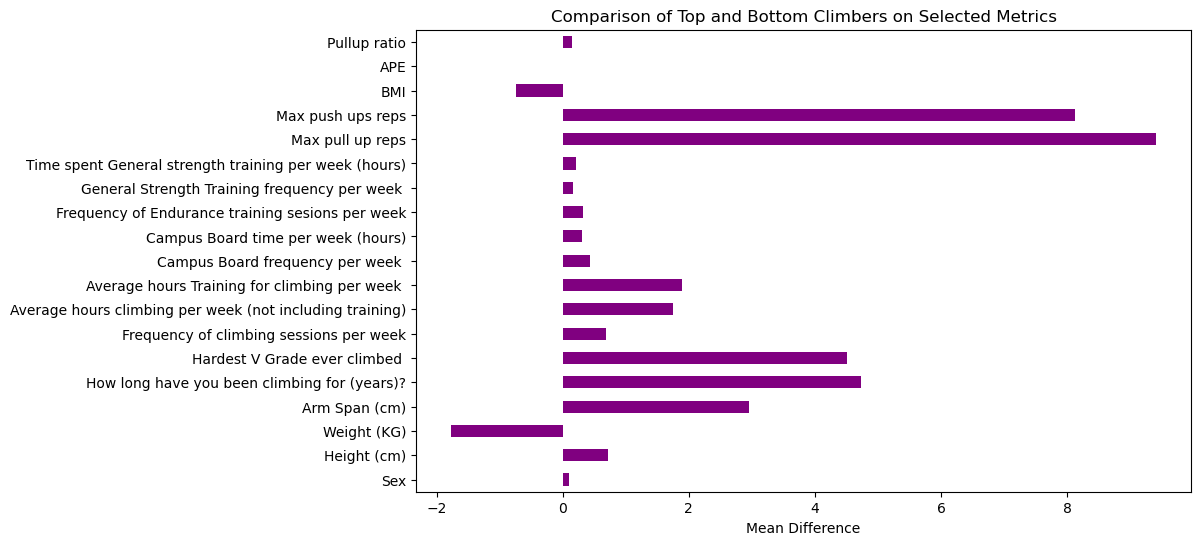

In [60]:
# Select the focus and projection variables for comparison
compare_vars = ['Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for (years)?',
       'Hardest V Grade ever climbed ',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Campus Board frequency per week ',
       'Campus Board time per week (hours)',
       'Frequency of Endurance training sesions per week',
       'General Strength Training frequency per week ',
       'Time spent General strength training per week (hours)',
       'Max pull up reps', 'Max push ups reps', 'BMI', 'APE', 'Pullup ratio']

# Group the data by the top_or_bottom column and calculate the mean
grouped = df_climb.groupby("top_or_bottom")[compare_vars].mean()

# Calculate the difference between top and bottom climbers
diff_mean = grouped.loc["Top"] - grouped.loc["Bottom"]

fig, ax = plt.subplots(figsize=(10,6))
diff_mean.plot.barh(ax=ax, color="purple")

ax.set_title("Comparison of Top and Bottom Climbers on Selected Metrics")
ax.set_xlabel("Mean Difference")

plt.show()


In [62]:
#Save to CSV for use in streamlit dashboard
df_climb.to_csv('GH_data_2.csv', index=False)

In [127]:
# Select features and target variable
features = ['Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for (years)?',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Campus Board frequency per week ',
       'Campus Board time per week (hours)',
       'Frequency of Endurance training sesions per week',
       'General Strength Training frequency per week ',
       'Time spent General strength training per week (hours)',
       'Max pull up reps', 'Max push ups reps', 'BMI', 'APE', 'Pullup ratio']
target = 'Hardest V Grade ever climbed '


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_climb[features], df_climb[target], test_size=0.2, random_state=42)

# Fit linear regression model to training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model on test data
mse = np.mean((model.predict(X_test) - y_test) ** 2)
r_squared = model.score(X_test, y_test)

print("Mean squared error: ", mse)
print("R-squared: ", r_squared)

Mean squared error:  3.595249177341661
R-squared:  0.5037993774562959
